## 1日の中で時間ごとの歩数の遷移をモデル化する

In [98]:
%matplotlib inline
import random
import numpy
import matplotlib.pylab as plt

### 杉山先生がランダム9人の10日間の歩数を時間ごとに出してはった

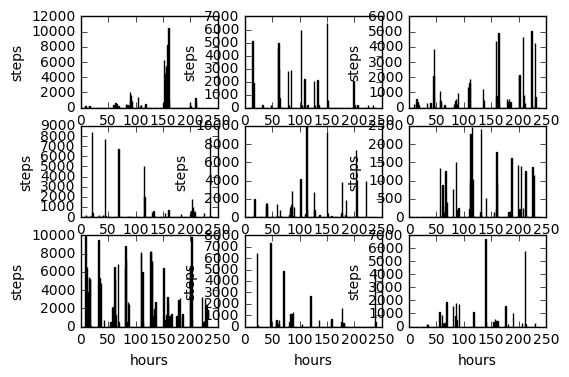

In [82]:
f = open('datasets.npz', 'rb')
dataset = numpy.load(f)
X = dataset['all']

f, axes = plt.subplots(3, 3)
for i in range(3):
    for j in range(3):
        datasets = X[random.randint(0, X.shape[0] - 1)]
        # print 'dataset: ', dataset
        axes[i][j].bar(xrange(240), datasets)
        axes[i][j].set_xlabel('hours')
        axes[i][j].set_ylabel('steps')
plt.show()

### 1日の中で1時間ごとの歩数のヒストグラムを作成

In [103]:
#print X.shape
#daily_steps = X
daily_step = X[:, :24]
#print daily_step.shape
daily_steps = daily_step[daily_step != 0.0]
#daily_steps.reshape(-1,)
#numpy.ravel(daily_steps)
#print daily_steps.shape

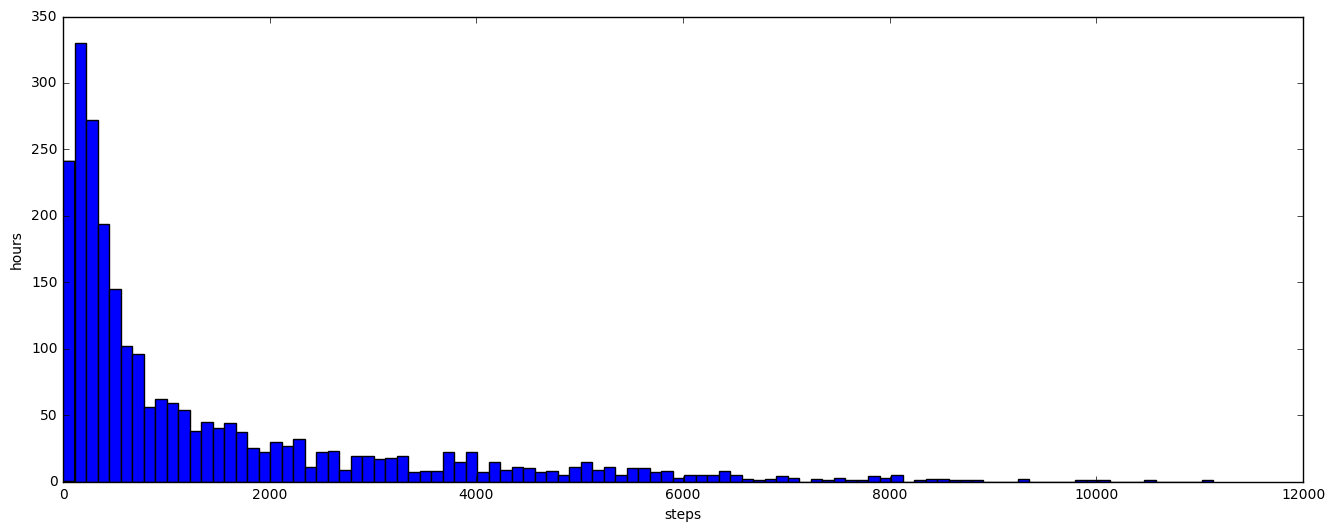

In [91]:
plt.figure(figsize=(16,6))
plt.hist(daily_steps, bins=100)
plt.xlabel('steps')
plt.ylabel('number')
#plt.xticks([5000])
plt.show()

In [92]:
print numpy.max(daily_steps)

11130.3


### 歩数を人の状態として捉えるためにK-meansでクラスタリング

In [138]:
from sklearn import decomposition
from sklearn.cluster import KMeans

# sklearnを使ってK-means法でクラスタリングする関数
numpy.delete(daily_step, numpy.where(daily_step==0.0))
#step = daily_step
step = daily_steps[:, numpy.newaxis]
clus = KMeans(n_clusters=4).fit_predict(step)
print step.shape
print clus.shape

(2426, 1)
(2426,)


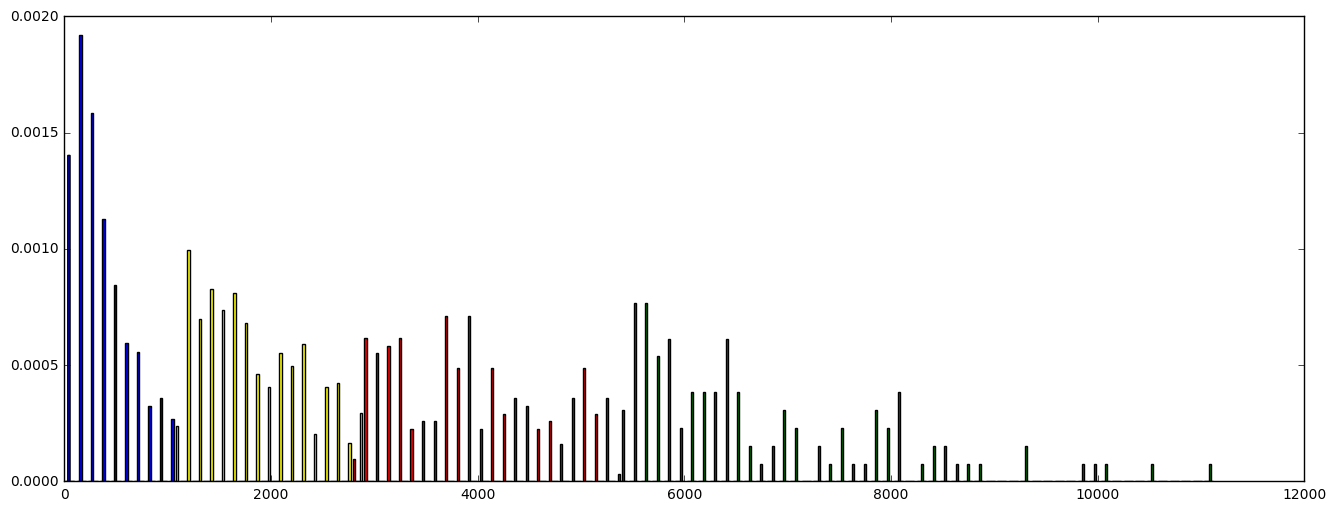

In [141]:
class0 = ([])
class1 = ([])
class2 = ([])
class3 = ([])

for i, data in zip(clus, daily_steps):
    if i == 0:
        class0.append(data)
    elif i == 1:
        class1.append(data)
    elif i == 2:
        class2.append(data)
    elif i == 3:
        class3.append(data)

plt.figure(figsize=(16,6))

plt.hist([class0, class1, class2, class3], bins=100, normed=True, color=['red', 'blue', 'green', 'yellow'], label=['x0','x1', 'x2', 'x3'])
        
plt.show()